In [7]:
%matplotlib inline
# Dependencies and Setup; We must import Mat Plot Lab for plotting, pandas and numpy are the languages were using
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Read the City and Ride Data
city_data = pd.read_csv('data/city_data.csv')
ride_data=pd.read_csv('data/ride_data.csv')


# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

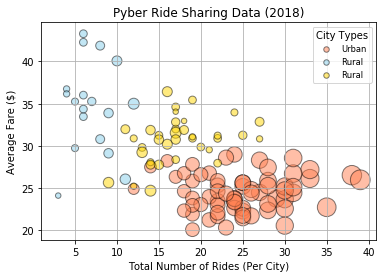

<Figure size 432x288 with 0 Axes>

In [49]:
#Assigning values to differnt city types; I decided to use the group by method
# Urban Data
avg_urban_fare = pyber_df[pyber_df["type"] == "Urban"].groupby("city").fare.mean()
urban_ride_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").ride_id.count()
urban_driver_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").driver_count.value_counts()

# Suburban Data
avg_suburban_fare = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").fare.mean()
suburban_ride_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").ride_id.count()
suburban_driver_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").driver_count.value_counts()

# Rural Data
avg_rural_fare = pyber_df[pyber_df["type"] == "Rural"].groupby("city").fare.mean()
rural_ride_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").ride_id.count()
rural_driver_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").driver_count.value_counts()




# Build the scatter plots for each city types; s = size, c= color
plt.scatter(urban_ride_total, 
            avg_urban_fare, 
            s=10*urban_driver_total, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Urban")

plt.scatter(rural_ride_total, 
            avg_rural_fare, 
            s=10*rural_driver_total, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Rural")

plt.scatter(suburban_ride_total, 
            avg_suburban_fare, 
            s=10*rural_driver_total, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Rural")


# MatPlot Dynamics
plt.title("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Show plot
plt.show()

# Save Figure
plt.savefig("Fig1.png")




## Total Fares by City Type

In [50]:
# Calculate Type Percents
type_percents = 100 * pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()





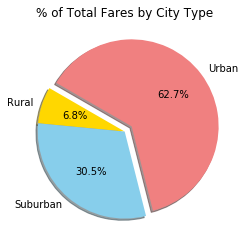

In [51]:
# Build Pie Chart; Labels are going to be our city types; we use gold light skyblue, and coral because 
#those are the companies colors
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fig2.png")

# Show Figure
plt.show()



# Show plot
plt.show()




## Total Rides by City Type

In [52]:
# Calculate Ride Percents

ride_percents = 100 * pyber_df.groupby(["type"]).sum()["ride_id"] / pyber_df["ride_id"].sum()


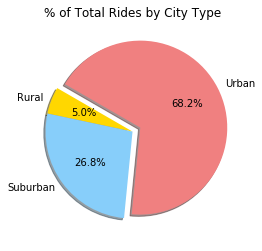

<Figure size 432x288 with 0 Axes>

In [53]:
# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.show()

# Save Figure 
plt.savefig("Fig3.png")

## Total Drivers by City Type

In [54]:
# Calculate Driver Percents
driver_percents = 100 * pyber_df.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

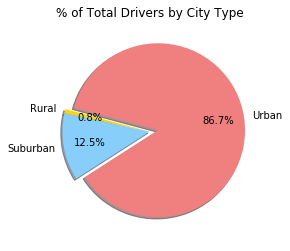

In [55]:
# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Fig4.png")

# Show Figure
plt.show()